In [60]:
from collections import UserList
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from collections import Counter
from scipy import stats as st
import praw
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import csv
import seaborn as sns
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
#nltk.download('punkt')
#nltk.download('stopwords')

In [36]:
reddit = praw.Reddit(client_id="S7A7slPULONjQRTduAYPnA", client_secret="5gO6NIvqR57ac0EoWiNY1jfkaUdVCg", 
                     user_agent="Ravenths",check_for_async=False)
    
subreddit = reddit.subreddit("depression")
top_posts= subreddit.top(limit=50) #Gets top 50 posts from r/depression
posts=[]
comments=[]
counter=0;

for post in top_posts: 
    postbody=reddit.submission(url=post.url) 
    posts.append(postbody.selftext) #Adds text from the body of the post to the posts list
    submission = reddit.submission(url=post.url)
    submission.comment_sort = "top"
    for index in range(len(submission.comments)):
        comments.append((submission.comments)[index].body) #Adds text from the body of the comment to the comments list
    counter+=1
    print(counter)
print("Finished colleting body's and comment's text.")

cd0hjp
1
i3ajk8
2
ccaxvm
3
g9ndgw
4
dpl4bu
5
del3c8
6
b5lw5z
7
720kcr
8
n959fs
9
j07hbh
10
bhlyu2
11
dbd5gr
12
f791jw
13
cp1ajy
14
cn5vlj
15
86lbej
16
ghdi7l
17
ijl5bq
18
jhc5fc
19
brsy1y
20
jq54zk
21
8mcrt9
22
gt5txv
23
jikvg7
24
cpvwhh
25
b7q1kc
26
kx7k2a
27
m5zy12
28
lgdpee
29
ia2nf9
30
k47q9a
31
hy1yi8
32
g3ljni
33
hpsn95
34
j45vaw
35
d9f2m4
36
dsgdf3
37
e00pxq
38
i2h6dv
39
jnuz7t
40
cqqe91
41
jizxdt
42
cd6d58
43
fjthj0
44
btcc3j
45
eu7fur
46
dzrccf
47
lmrsbh
48
cvmbzg
49
c1ug9l
50
Finished colleting body's and comment's text.


In [54]:
print(len(comments))

6356


In [79]:
sentimentscorescomments=[]
sentimentscoresposts=[]
frequencycomments=[]
frequencyposts=[]
totalcommentnegscore=0
totalpostnegscore=0
totalcommentposscore=0
totalpostposscore=0
sia = SentimentIntensityAnalyzer()

for index in range (len(comments)):
    #Gets the sentiment score of each comment, and adds the negative and positive scores to the total respectively
    sentimentscorescomments.append(sia.polarity_scores(comments[index]))
    totalcommentnegscore+=sentimentscorescomments[index]['neg']
    totalcommentposscore+=sentimentscorescomments[index]['pos']
    
    #Data cleaning each comment.
    words= nltk.word_tokenize(comments[index].lower())
    words = [word for word in words if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    #Finding the frequency of each comment
    fd = nltk.FreqDist(words)
    frequencycomments.append(Counter(fd)) #Transforming into Counter for easy merging of all comment frequency distributions
    
for index in range (len(posts)):
    #Gets the sentiment score of each post, and adds the negative and positive scores to the total respectively
    sentimentscoresposts.append(sia.polarity_scores(posts[index]))
    totalpostnegscore+=sentimentscoresposts[index]['neg']
    totalpostposscore+=sentimentscoresposts[index]['pos']
    
    #Data cleaning each post.
    words= nltk.word_tokenize(posts[index].lower())
    words = [word for word in words if word.isalpha()]
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    #Finding the frequency of each post.
    fd = nltk.FreqDist(words)
    frequencyposts.append(Counter(fd)) #Transforming into Counter for easy merging of all posts frequency distributions

In [67]:
#Calculating averages
averagecommentneg=totalcommentnegscore/len(sentimentscorescomments)
averagecommentpos=totalcommentposscore/len(sentimentscorescomments)
averagepostneg=totalpostnegscore/len(sentimentscoresposts)
averagepostpos=totalpostposscore/len(sentimentscorescomments)

In [86]:
#Merging all the comments and posts into one Counter
mergedcomments = Counter()
mergedposts=Counter()
for index in range(len(frequencycomments)):
    mergedcomments=mergedcomments+ frequencycomments[index]
for index in range(len(frequencyposts)):
    mergedposts=mergedposts + frequencyposts[index]

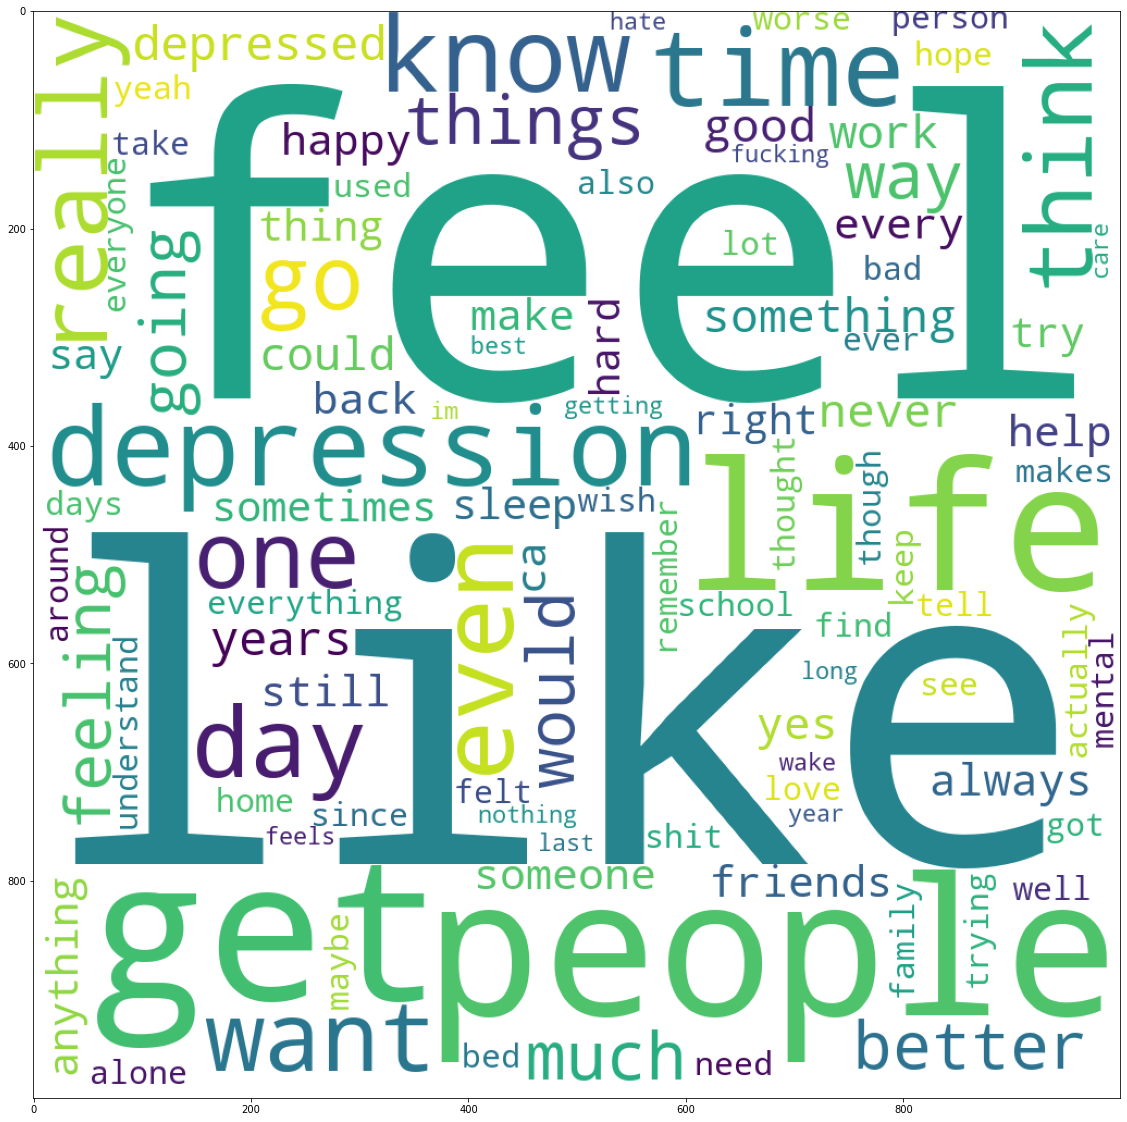

In [90]:
#Creating the comments wordcloud
wordcloudc = WordCloud(background_color="white",width=1000,height=1000, max_words=100, normalize_plurals=False).generate_from_frequencies(mergedcomments)
plt.figure(figsize=(20,20))
plt.imshow(wordcloudc)
plt.savefig('Comments Word Cloud.png')

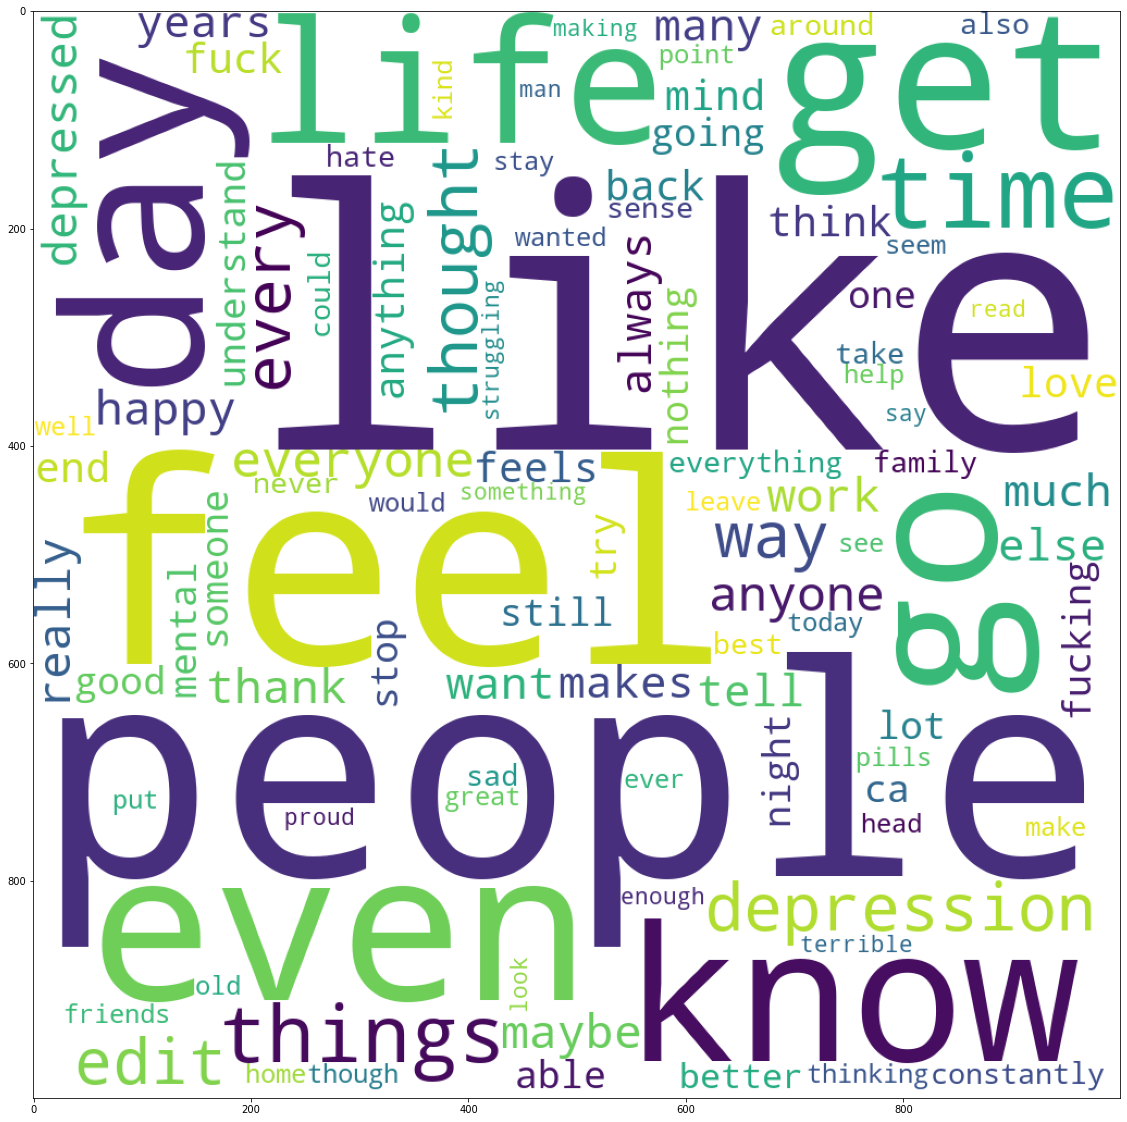

In [91]:
#Creating the posts wordcloud
wordcloudp = WordCloud(background_color="white",width=1000,height=1000, max_words=100, normalize_plurals=False).generate_from_frequencies(mergedposts)
plt.figure(figsize=(20,20))
plt.imshow(wordcloudp)
plt.savefig('Posts Word Cloud.png')

<class 'pandas.core.series.Series'>


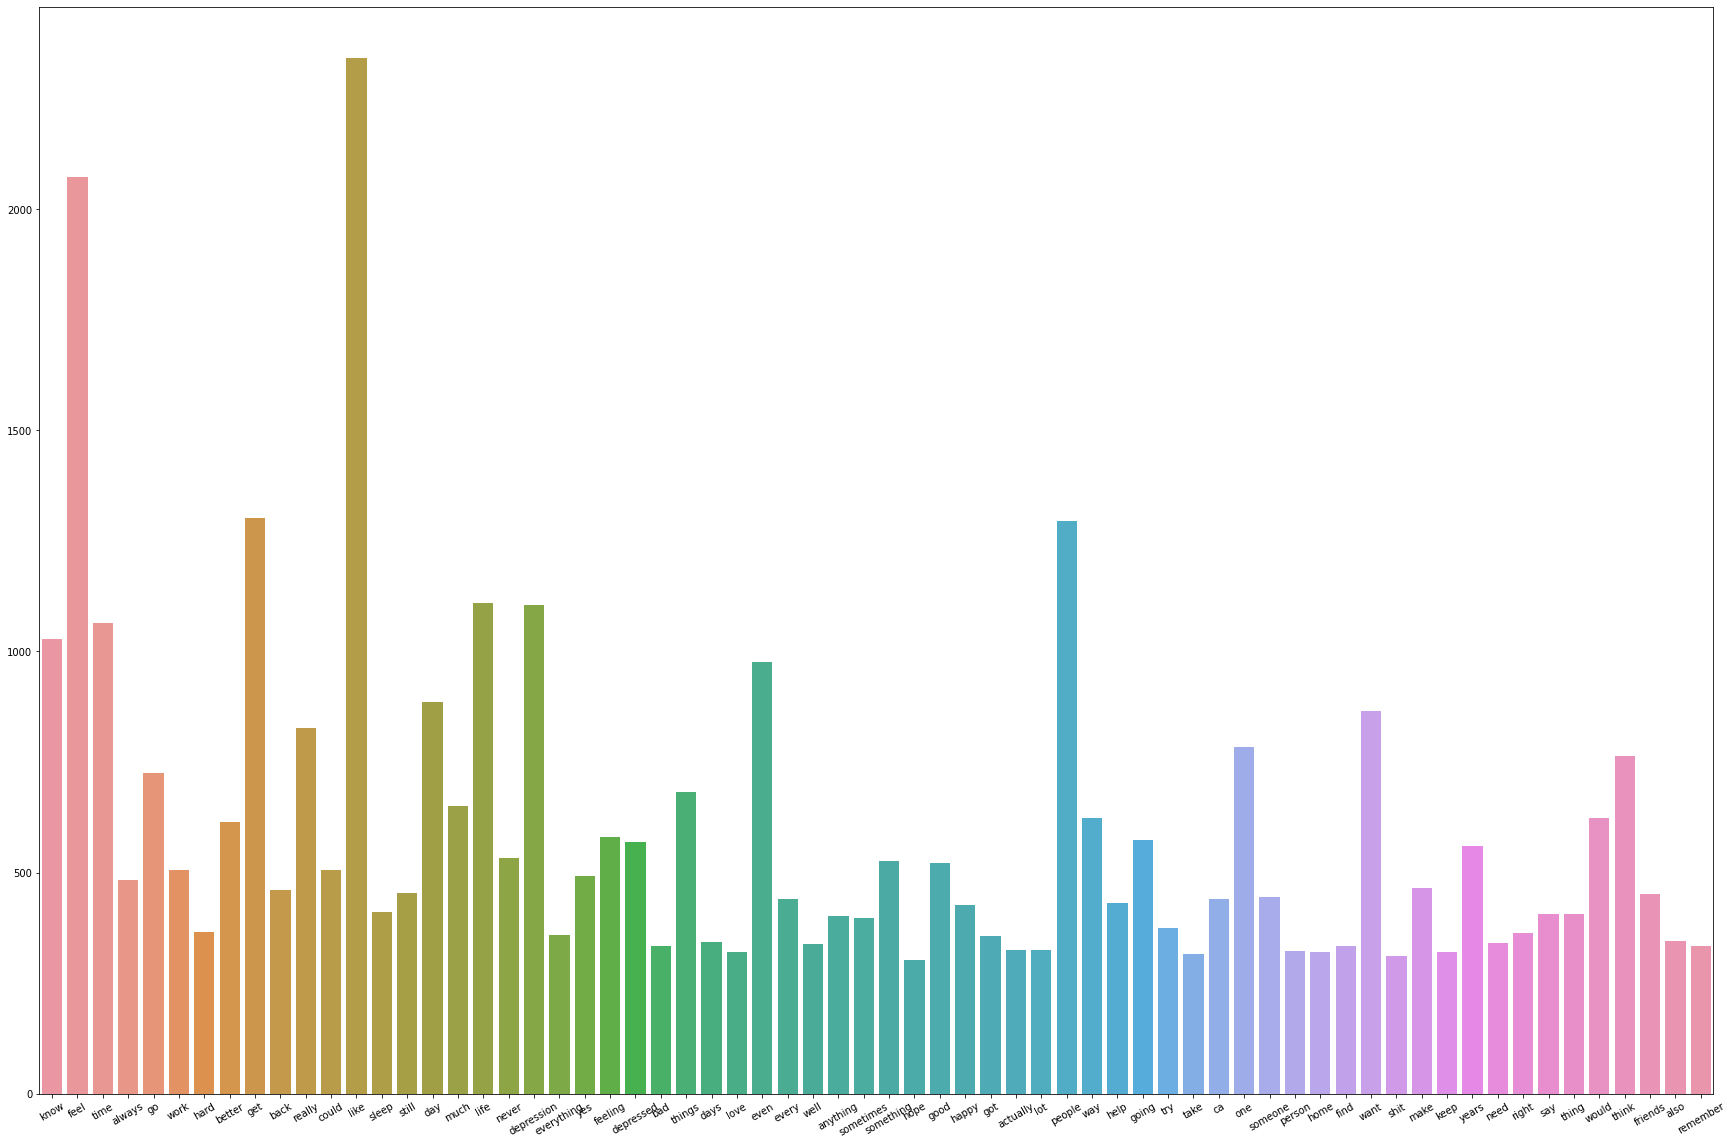

In [89]:
#Creating a histogram of words from comments that appear more than 300 times
mergedcommentsstrimmed={key:val for key, val in mergedcomments.items() if val > 300}
plotdata=pd.Series(mergedcommentsstrimmed)
print(type(plotdata))
fig, ax = plt.subplots(figsize=(30,20))
all_plot = sns.barplot(x=plotdata.index, y=plotdata.values, ax=ax)
plt.xticks(rotation=30);
plt.savefig('Histogram.png')

In [ ]:
#Transforming into DataFrame for saving and t-tests.
dataframessc = pd.DataFrame(sentimentscorescomments)
dataframessp = pd.DataFrame(sentimentscoresposts)
np.savetxt(r"C:\Users\Maria Xu\Desktop\Data_Scrapping\Sentiment Scores Comments.txt", dataframessc)
np.savetxt(r"C:\Users\Maria Xu\Desktop\Data_Scrapping\Sentiment Scores Posts.txt", dataframessp)

In [ ]:
st.ttest_ind(a=dataframessc['neg'], b=dataframessp['neg'])

In [ ]:
st.ttest_ind(a=dataframessc['pos'], b=dataframessp['pos'])